# Classifier Demonstration

In [30]:
%resef -f
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

UsageError: Line magic function `%resef` not found.


In [31]:
# load credit card data from website
bad_data = pd.read_csv('http://people.stern.nyu.edu/wgreene/Text/tables/TableF21-4.txt')

# data munging to get it into nice csv format
parsed_entries = [[e for e in row.split()] for row in bad_data.iloc[2:,0]]
all_entries = []
for r in parsed_entries:
    all_entries.extend(r)
all_entries = np.array(all_entries).reshape((1319,13))
rows = [",".join(r) for r in all_entries]
s = "\n".join(rows)
titles = "Cardhldr,Majordrg,Age,Income,Exp_Inc,Avgexp," +\
         "Ownrent,Selfempl,Depndt,Inc_per,Cur_add,Major,Active\n"
# save nice data
with open("creditCard.csv","w") as f:
    f.write(titles)
    f.write(s)
    
# load data into pandas dataframe
data = pd.read_csv("creditCard.csv",
                  dtype = {"Cardhldr":np.int,
                           "Majordrg":np.int,
                           "Ownrent":np.int,
                           "Selfempl":np.int,
                           "Depndt":np.int,
                           "Cur_add":np.int,
                           "Major":np.int,
                           "Active":np.int})

# let's take a quick look at the data
print(data.head())

# set rng seed for reproducibility
np.random.seed(seed=1337)

# randomly partition data into train (80%) and test (20%) sets
train,test = train_test_split(data, test_size=.2)

   Cardhldr  Majordrg       Age  Income   Exp_Inc      Avgexp  Ownrent  \
0         1         0  37.66667  4.5200  0.033270  124.983300        1   
1         1         0  33.25000  2.4200  0.005217    9.854167        0   
2         1         0  33.66667  4.5000  0.004156   15.000000        1   
3         1         0  30.50000  2.5400  0.065214  137.869200        0   
4         1         0  32.16667  9.7867  0.067051  546.503300        1   

   Selfempl  Depndt   Inc_per  Cur_add  Major  Active  
0         0       3  1.130000       54      1      12  
1         0       3  0.605000       34      1      13  
2         0       4  0.900000       58      1       5  
3         0       0  2.540000       25      1       7  
4         0       2  3.262233       64      1       5  


Accuracy: 0.9810606060606061
ROC Curve:


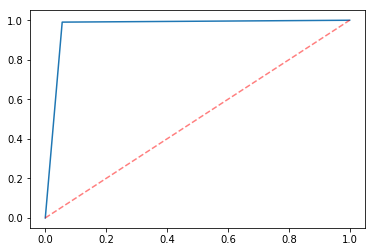

AUC: 0.9674603174603175


In [17]:
# DECISION TREE
dt = DecisionTreeClassifier()

# train the model
dt.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = dt.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = dt.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,0],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,0],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

(1055,)
Accuracy: 0.9810606060606061
ROC Curve:


/Users/Yiteng/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


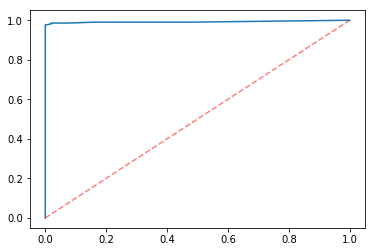

AUC: 0.9922398589065257


In [18]:
# RANDOM FOREST
rf = RandomForestClassifier()
# train the model
rf.fit(train.iloc[:,1:],train.iloc[:,0])
print(np.shape((train.iloc[:,0])))
# predict the labels and report accuracy
hard_pred = rf.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = rf.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,0],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,0],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

Accuracy: 0.9886363636363636
ROC Curve:


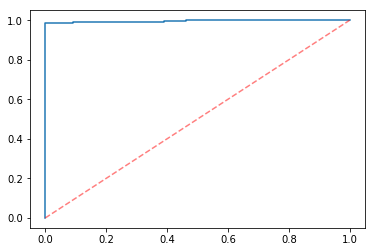

AUC: 0.9955026455026454


In [19]:
# GRADIENT BOOSTED TREES
gb = GradientBoostingClassifier()

# train the model
gb.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = gb.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = gb.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,0],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,0],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

      Majordrg       Age  Income   Exp_Inc      Avgexp  Ownrent  Selfempl  \
1103         2  25.91667  2.0700  0.000580    0.000000        0         0   
720          0  23.50000  2.8000  0.063393  147.333300        0         0   
945          0  19.00000  2.8000  0.167214  390.166700        1         0   
816          0  34.91667  3.0000  0.014649   36.205000        0         0   
678          0  34.83333  3.6000  0.038827  116.315000        1         1   
639          0  34.25000  2.4000  0.000500    0.000000        0         0   
1258         0  35.58333  3.5606  0.109084  323.587500        0         0   
322          0  25.33333  2.1000  0.196675  344.180800        1         0   
540          1  28.25000  2.3000  0.034896   66.300830        1         0   
539          0  25.33333  2.6400  0.000455    0.000000        0         0   
312          0  21.66667  2.1600  0.110629  198.548300        1         0   
789          0  31.25000  5.5000  0.070863  324.705000        1         0   

/Users/Yiteng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


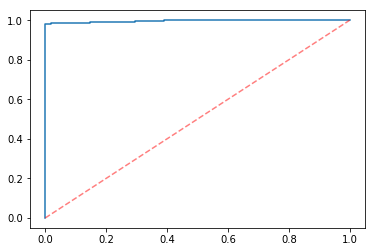

AUC: 0.9959435626102293


In [35]:
# LOGISTIC REGRESSION
# initialize a logistric regression object
lr = LogisticRegression()

# train the model
lr.fit(train.iloc[:,1:],train.iloc[:,0])
print('densify')
print('the coeff is',lr.coef_)
# predict the labels and report accuracy
hard_pred = lr.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = lr.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,0],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,0],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

/Users/Yiteng/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8484848484848485
ROC Curve:


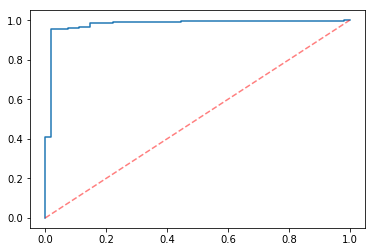

AUC: 0.9783068783068785


In [8]:
# SUPPORT VECTOR MACHINE
sv = SVC(probability=True)

# train the model
sv.fit(train.iloc[:,1:],train.iloc[:,0])

# predict the labels and report accuracy
hard_pred = sv.predict(test.iloc[:,1:])
acc = np.isclose(hard_pred,test.iloc[:,0]).sum()/len(hard_pred)
print("Accuracy: {}".format(acc))

# use predicted probabilities to construct ROC curve and AUC score
soft_pred = sv.predict_proba(test.iloc[:,1:])
fpr,tpr,thresh = roc_curve(test.iloc[:,0],soft_pred[:,1])
auc = roc_auc_score(test.iloc[:,0],soft_pred[:,1])
print("ROC Curve:")
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",alpha=.5)
plt.show()
print("AUC: {}".format(auc))

In [ ]:
importance_origin = importance[:]
feature_name = (list(pd.read_csv('ProPublica_COMPAS_preprocessed.csv',nrows = 0)))[1:-1]
importance_dict_small = dict(zip(importance,feature_name))
sorted_dict = collections.OrderedDict(sorted(importance_dict_small.items()))
plt.bar( sorted_dict.values(),sorted_dict.keys(), color='g')
plt.xticks(rotation = 45)
plt.xlabel("features")
plt.ylabel("importance of features")
plt.show()
print("The ordered importance of the features is listed ascendingly as follows: ", list(sorted_dict.values()))